<a href="https://colab.research.google.com/github/kevinball02/HUFS-ML-Project/blob/master/Transformers_27_36_kyh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Joshua K. Cage 저자 임선집 옮긴이의 101가지 문제로 배우는 딥러닝 허깅페이스 트랜스포머 with 파이토치(Python Transformers By Huggingface Hands On:)의 예제를 실행한 것임을 알립니다.  
This code has been brought from the GitHub repository below and has been slightly modified.:

https://github.com/jasonyim2/book3/blob/main/Transformers%2027-36.ipynb "

# 27

In [ ]:
!pip install transformers
!pip install ftfy ## 새 주석: 외국어에 대한 문자열 깨짐(Mojibake)을 해결하기 위한 모듈.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.3 MB/s eta 0:00:00


# 28

In [ ]:
!git clone https://github.com/kevinball02/HUFS-ML-Project.git

Cloning into 'HUFS-ML-Project'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 159 (delta 31), reused 0 (delta 0), pack-reused 88
Receiving objects: 100% (159/159), 11.02 MiB | 16.87 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [ ]:
# Pillow 라이브러리(PIL)를 사용하여 이미지 불러오기
from PIL import Image
import requests

#url = "https://raw.githubusercontent.com/kevinball02/HUFS-ML-Project/master/000192613551.jpg"
#image = Image.open(requests.get(url, stream=True).raw)
image = Image.open("/content/HUFS-ML-Project/000192613551.jpg") ## 새 주석: 갖고 있는 사진을 github에 올린 후, 가져와서 사용함.
image

# 29

In [ ]:
# 모델 및 프로세서 불러오기
from transformers import CLIPProcessor, CLIPModel
## 새 주석: "pretrained model!"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 30

In [ ]:
model ## 새 주석: 가져온 pre-trained CLIP 모델에 대한 설명

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,

# 31

In [ ]:
# 텍스트를 리스트 타입으로 입력
candidates = ["a parrot sitting on a wire", "a photo of a parrot", "a photo of a dove", "a bird", "two parrots sitting on a wire"]
## 새 주석: 가져온 사진에 적합한 예시 문장으로 변경.
# 프로세서(ClIPPprocessor)에 텍스트 및 이미지를 입력하여 인코딩
inputs = processor(text=candidates, images=image, return_tensors="pt", padding=True)

# inputs 출력
inputs

{'input_ids': tensor([[49406,   320, 23565,  4919,   525,   320,  7794, 49407, 49407],
        [49406,   320,  1125,   539,   320, 23565, 49407, 49407, 49407],
        [49406,   320,  1125,   539,   320, 18281, 49407, 49407, 49407],
        [49406,   320,  3329, 49407, 49407, 49407, 49407, 49407, 49407],
        [49406,  1237,   699, 16642,  4919,   525,   320,  7794, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-0.4784,  0.1055, -0.7704,  ..., -0.9456, -1.0185, -1.1499],
          [-0.4054, -0.9748, -1.2521,  ..., -1.3105, -1.2667, -1.2813],
          [-0.2156, -1.0623, -1.3397,  ..., -1.4419, -1.5149, -1.5003],
          ...,
          [-0.3762, -0.8434, -0.4930,  ...,  1.6822,  1.6968,  1.6822],
          [-0.4054, -0.6390, -0.1572,  ...,  1.6822,  1.6822,  1.6968],
          [-0.7850, -0.

#32

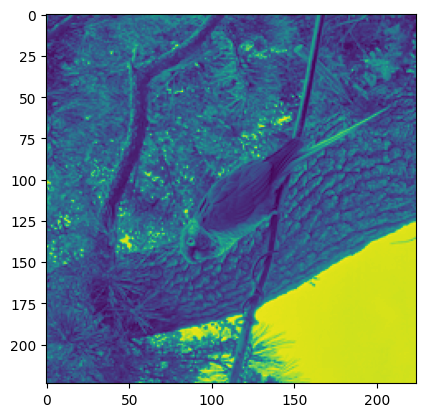

In [ ]:
# 인코딩한 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(inputs['pixel_values'][0][0]);

In [ ]:
# inputs['pixel_values'] 차원 확인
inputs['pixel_values'].shape ## 새 주석: (one image, rgb, row, column)

torch.Size([1, 3, 224, 224])

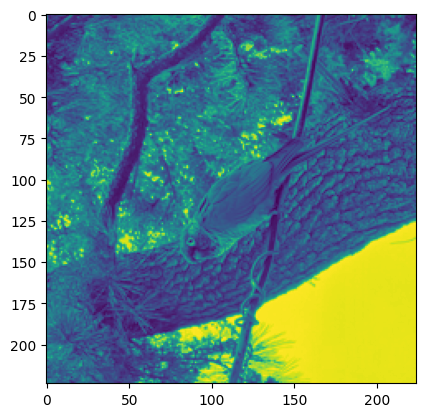

In [ ]:
# 인코딩한 이미지 출력. 인덱스를 [0][1]로 변경
import matplotlib.pyplot as plt
plt.imshow(inputs['pixel_values'][0][1]);

# 33

In [ ]:
# 인코딩된 텍스트 출력
inputs['input_ids'][1]

tensor([49406,   320,  1125,   539,   320, 23565, 49407, 49407, 49407])

In [ ]:
# 위의 결과를 디코딩한 텍스트 출력
processor.tokenizer.decode(inputs['input_ids'][1]) ## 새 주석: Input sequence에 대한 각각의 embeddings.

'<|startoftext|>a photo of a parrot <|endoftext|><|endoftext|><|endoftext|>'

# 34

In [ ]:
# 모델을 eval 모드로 전환
model.eval()

# **inputs에서의 ** 표시는 inputs 변수가 키(key)와 값(value)로 이루어져 있을 때
# input 변수에 담긴 키와 값을 모두 모델에 입력하는 용도임
outputs = model(**inputs)

# 출력물 outputs의 키(key) 출력
outputs.keys() ## 새 주석: 들어온 이미지, 텍스트에 대해 각각 logits, embeds, output을 담고 있다.

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

# 35

In [ ]:
logits_per_image = outputs.logits_per_image
print(logits_per_image) ## 새 주석: output의 'logits_per_image' key에 해당하는 값(value)을 출력.

tensor([[28.0945, 27.9492, 20.5378, 25.2695, 26.1656]], grad_fn=<TBackward0>)


# 36

In [ ]:
# logits_per_image에 담긴 값을 입력값 행별로(dim=1) 소프트맥스 함수에 투입
probs = logits_per_image.softmax(dim=1) ## 새 주석: softmax로 Input text에 대한 확률 계산

import torch

# 변수 probs에 담긴 값 중에 최고값의 인덱스를 argmax로 찾고
# item()을 통해 레이블 즉 제목을 출력
# 그 결과가 cadidates의 인덱스 값이 됨
print(candidates[torch.argmax(probs).item()]) ## 새 주석: 가장 높은 확률에 해당하는 텍스트 출력

a parrot sitting on a wire
